In [1]:
%reload_ext autoreload
%autoreload 2

from magnetism import *
import matplotlib.pyplot as plt
import numpy as np
import functools
import pandas as pd
from IPython.display import display
from timeit import default_timer as timer

## Assignment 2: Magnetism
### _Kevin Vonk, s1706896, feb-mar 2020_

## Part 1

#### 1a)
Starting with the derivative of F to B,

$$
\begin{aligned}
    \frac{\partial F}{\partial B} &= -\frac{\partial}{\partial B} \frac{1}{\beta} \ln{Z} \\
    &= -\frac{1}{Z\beta} Z * -\beta \frac{\partial E}{\partial B} \\
    &= -\frac{1}{Z} \sum_{i=1}^K M(S_i)e^{-\beta E},
\end{aligned}
$$

which proves that

$$
\langle M\rangle = -\frac{\partial F}{\partial B}.
$$

#### 1b)
Starting with the derivative of the expectation value of M to B,

$$
\begin{aligned}
    \frac{\partial \langle M \rangle}{\partial B} &= \frac{\partial}{\partial B} \frac{1}{Z} \sum Me^{-\beta E} + \frac{1}{Z} \frac{\partial}{\partial B} \sum Me^{-\beta E} \\
    &= -\beta M \frac{1}{Z} \sum Me^{-\beta E} e^{-\beta E} + \frac{1}{Z} \sum Me^{-\beta E} \beta M \\
    &= \beta \left( \langle M^2\rangle - \langle M \rangle^2 \right),
\end{aligned}
$$

which is exactly the expected form.

#### 2)
In the Ising model with $N$ spins, there will be a total $2^N$ spin configurations. There are two options (spin-up and spin-down), and N elements which can take on these two options. If a computer can calculate $10^9$ configurations per second, we will get execution times as shown in the table below.

| $N$ | $L$ | Execution time (s) |
| --- | --- | --- |
| $5$ | $25$ | $0,034$ |
| $10$ | $100$ | $1,27*10^{21}$ |

From this table we can see that brute-forcing every possibility is simply not an option. Humanity will not be alive long enough to ever see the answer using this method.

#### 3a)
The transition probability $T$ is symmetric, since the probability for flipping any spin is constant. Since the index of the spin to flip is chosen randomly, and thus not dependent on energy or position, the probability of picking any index $i$ is as equal as picking index $j$. Furthermore, the probability is constant over the moves in the system. That means that the probability of picking index $i$ will remain unchanged. Combining this, we can say that $T$ is symmetric.

#### 3b)
The detailed balance is defined as
$$
P(S)W(S \rightarrow S') = P(S')W(S' \rightarrow S),
$$

where $W$ is defined as

$$
W(S \rightarrow S') = T(S \rightarrow S')A(S \rightarrow S').
$$

There are two values for A. Starting with $A = 1$, the detailed balance becomes

$$
P(S)T(S \rightarrow S') = P(S')T(S' \rightarrow S),
$$

which, since $T$ is symmetric, becomes

$$
P(S) = P(S'),
$$

which is what we would expect. Now, for $A = \frac{P(S')}{P(S)}$, the detailed balance becomes

$$
P(S)\frac{P(S')}{P(S)}T(S \rightarrow S') = P(S')\frac{P(S')}{P(S)}T(S' \rightarrow S).
$$

Again, using the fact that $T$ is symmetric and dropping the $\frac{P(S')}{P(S)}$ term on both sides, we obtain,

$$
P(S) = P(S'),
$$

which again is expected.

#### 3c)
Whenever a move is rejected, we must still add the current value of $M(S)$ to the average magnetisation, because we have taken a step in our system and are thus residing in a new state. The fact that nothing has changed in the system doesn't matter, this new state is still different than the previous.

#### 4a)
We are going to work with the energy difference $\Delta E$.

$$
\Delta E = E(S') - E(S) = -B\left(\sum s'_i - \sum s_i \right) = \mp 2B = 
\begin{cases}
    -2B & \text{for} \; -1 \; \rightarrow \; +1 \\
    2B & \text{for} \; +1 \; \rightarrow \; -1
\end{cases}
$$

#### 4b)
$M(S)$ is the sum of all individual spins, $\sum s_i$. If we flip a spin, this introduces a change in $M(S)$ as follows,

$$
M(S') = M(S) - \frac{\Delta E}{B} = 
\begin{cases}
    M(S) + 2 & \text{for} \; -1 \; \rightarrow \; +1 \\
    M(S) - 2 & \text{for} \; +1 \; \rightarrow \; -1
\end{cases}
$$

#### 4c)
We needn't store all the spin configurations over the whole sequence. We only need to start with an initial state and calculate the relevant quantities in that state. Then, we can say that the initial state is the current state. For every iteration we can flip a spin in the current state, and update the relevant quantities using the deltas explored above. As long as we keep the current state "up-to-date", we shouldn't need every step in the sequence.

#### 5a)

The result of three Monte Carlo simulations are found in the plot below. The behaviour for each run is very similar. We first see a convergence towards the exact result. After an amount of steps have passed, we see a random walk around the exact result.

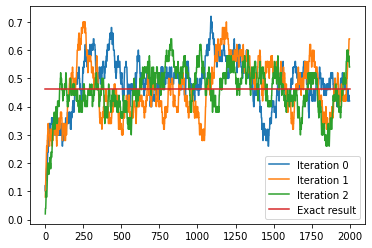

In [2]:
N = 2000

for i in range(3):
    lattice = Lattice(L = 10, B = 0.5)
    solver = Solver(lattice)

    M = []
    for lat in solver.iterate(N):
        M.append(lat.M)

    plt.plot(range(N), np.array(M)/100, label=f"Iteration {i}")

plt.plot((0, N), [np.tanh(0.5) for _ in range(2)], label=f"Exact result")
plt.legend()

#### 5b)
In the case of the figure above, we could say that $\kappa \approx 200$ steps. For larger $\left| B \right|$ this value will be larger, since it takes more steps of changing a single spin to reach a higher exact value.

#### 5c)
We will do 100 measurements with $L = 10$, $B = 0,5$, $N = 2000$. The computed magnetisation and standard deviation can be found below the code block.

In [3]:
N = 2000
iter = 100
L = 10
exp = []
m2 = []

for _ in range(iter):
    lattice = Lattice(L = L, B = 0.5)
    solver = Solver(lattice)

    M = []
    for lat in solver.iterate(N):
        M.append(lat.M)

    m = np.array(M[200:]) / (L**2)
    exp.append(1/len(m) * np.sum(m))
    m2.append(1/len(m) * np.sum(m**2))

exp = np.array(exp)
m2 = np.array(m2)

print(f"Computed: m = {np.mean(exp)} ± {np.std(exp)} (standard deviation)")
print(f"   Exact: m = {np.tanh(0.5)}")

Computed: m = 0.4606555555555555 ± 0.020321595762168573 (standard deviation)
   Exact: m = 0.46211715726000974


The standard deviation seems a reasonable expression for the error, with the exact magnetisation falling in the domain of the computed magnetisation and the error about two-thirds of the runs (as is expected from the standard deviation).

#### 5d)
The computed error using this method is given below.

In [4]:
dm = np.sqrt((m2 - exp**2)/(len(m)-1))

print(f"Computed: m = {np.mean(exp)} ± {np.mean(dm)} (delta m over average M)")

Computed: m = 0.4606555555555555 ± 0.002019648632448946 (delta m over average M)


The error computed using this method is about a factor 10 smaller than the standard deviation. This makes $\Delta_m$ not a great estimate of the error. We can at least say that the data is reasonably decorrelated, but this is to be expected given the way random numbers are generated, pseudo random or not.

#### 5e)
We will do 50 times 2000 iterations for $L=5$ and for $L=15$, and average out the requested variables. Since we are doing multiple experiments, and we do not have the patience to look at 100 graphs to determine $\kappa$ for each one, we will programatically determine $\kappa$. This will be done by taking $\kappa$ as the first point where the computed average magnetisation per site is higher than the exact result. This will mean we lose some additional points which for which our simulation could already be considered converged. It also means that $\kappa$ will be larger than by determining it manually. However, for comparison this suffices.

In [5]:
L = (5, 15)
iter = 50
N = 2000

m_exact = np.tanh(0.5)
res = {}

for i, l in enumerate(L):
    kappa = []
    m_avg = []
    m_fluc = []
    time = []

    for _ in range(iter):
        t_start = timer()
        lattice = Lattice(L = l, B = 0.5)
        solver = Solver(lattice)
        m = []

        for lat in solver.iterate(N):
            m.append(lat.M / (l**2))

        _kappa = np.where(m >= m_exact)[0][0]
        m = np.array(m[_kappa:])

        kappa.append(_kappa)
        m_avg.append(1/len(m) * np.sum(m))
        m_fluc.append((np.min(m), np.max(m)))
        time.append(timer() - t_start)

    res[f"L = {l}"] = {
        r"$\kappa$": np.mean(kappa),
        r"$m_{avg}$": np.mean(m_avg),
        r"$m_{min, max}$": [i / iter for i in functools.reduce(lambda a, b: (a[0] + b[0], a[1] + b[1]), m_fluc)],
        r"$t_{exec}$/run (s)": np.mean(time)
    }

df = pd.DataFrame(data=res)
display(df)

,L = 5,L = 15
$\kappa$,35.42,434.96
$m_{avg}$,0.467778,0.457121
"$m_{min, max}$","[-0.07680000000000003, 0.9328000000000007]","[0.33279999999999993, 0.575111111111111]"
$t_{exec}$/run (s),0.170977,0.174754


From the results table above we can see what effect increasing $L$ has on the system. On average, it takes more Monte Carlo steps before the system is "converged", as indicated by $\kappa$. As expected, the average magnetisation doesn't change (within an error bound), since the magnetisation per site is independent of the grid. The maximum and minimum average magnetisations per site decrease as the grid increases. This makes sense, as when the amount of sites increases, the effect of flipping one spin has an equal effect on $M$, but a smaller effect on $m = \frac{M}{L^2}$. The execution time increases slightly when increasing $L$. Its complexity is governed by numpy's random function if the amount of Monte Carlo steps stays the same.

#### 6a)

Starting off with the code from 5a), we get the code block as found below. A plot of three iteration attempts is also given.

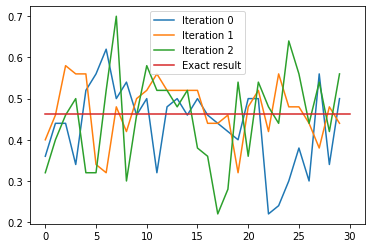

In [6]:
n = 30
L = 10

for i in range(3):
    lattice = Lattice(L = L, B = 0.5)
    solver = Solver(lattice)
    gen = solver.iterate()

    M = []
    for _ in range(n):
        for _ in range(L**2):
            lat = next(gen)
        
        M.append(lat.M)

    plt.plot(range(n), np.array(M)/100, label=f"Iteration {i}")

plt.plot((0, n), [np.tanh(0.5) for _ in range(2)], label=f"Exact result")
plt.legend()

#### 6b)

In 5b), we determined $\kappa \approx 200$. Relating that to the situation here, it would mean $\kappa \approx 2$. However, as we can deduce from the plot, it is near impossible to determine when the tail of the convergence ends and the oscillating behaviour around a mean starts. Therefore, we could say that the equilibration time is zero. The system is in equilibrium from the word go. 

#### 6c)

In [7]:
n = 30
L = 10
iter = 100

lattice = Lattice(L = L, B = 0.5)
solver = Solver(lattice)
gen = solver.iterate()

exp_m = []
exp_m2 = []

for _ in range(iter):
    M = []
    for _ in range(n):
        for _ in range(L**2):
            lat = next(gen)

        M.append(lat.M)
        
    m = np.array(M) / L**2
    exp_m.append(1/len(M) * np.sum(m))
    exp_m2.append(1/len(m) * np.sum(m**2))
    
exp_m = np.array(exp_m)
exp_m2 = np.array(exp_m2)

dm = np.sqrt((m2 - exp**2)/(len(m)-1))

print(f"   Exact: m = {np.tanh(0.5)}")
print(f"Computed: m = {np.mean(exp)} ± {np.std(exp)} (standard deviation)")
print(f"Computed: m = {np.mean(exp)} ± {np.mean(dm)} (delta m over average M)")

   Exact: m = 0.46211715726000974
Computed: m = 0.4606555555555555 ± 0.020321595762168573 (standard deviation)
Computed: m = 0.4606555555555555 ± 0.01590715095841106 (delta m over average M)


From the results of the script we can easily see that the error on the magnetisation per site $\Delta_m$ now is a much more reasonable error. It is smaller than the standard deviation, but still large enough that it encompasses the exact value within its bounds. I find it interesting to see that this switch to only storing every $L^2$'th point ensures that $\Delta_m$ is suddenly a reasonable error estimate. I presume the influence of $N_{MC}$ in $\Delta_m$, which now is a much smaller value, ensures that the error doesn't get too small to quickly.

#### 7)
The relevant script and plot are found below. The computed values closely follow the exact result.

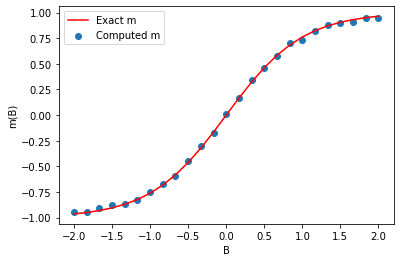

In [8]:
L = 10
iter = 40
B = np.linspace(-2, 2, 25)
solver = Solver(None)
m = []
res = []

for b in B:
    solver.lattice = Lattice(L = L, B = b)
    tmp = solver.fullsolve(iter, ("<m>", "chi"))
    res.append(tmp)
    m.append(tmp["<m>"])
    
plt.scatter(B, m, label="Computed m")
plt.plot(B, np.tanh(B), label="Exact m", color="r")
plt.xlabel("B")
plt.ylabel("m(B)")
plt.legend()

#### 8a)

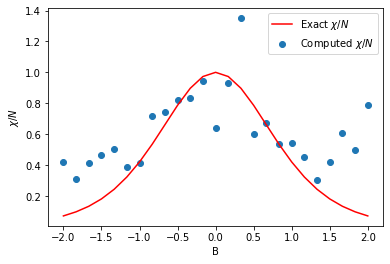

In [9]:
plt.scatter(B, [i["chi"]/L**2 for i in res], label=r"Computed $\chi / N$")
plt.plot(B, 1/np.cosh(B)**2, label=r"Exact $\chi / N$", color="r")
plt.xlabel("B")
plt.ylabel(r"$\chi / N$")
plt.legend()

What we can see from the plot, is that the computed fluctuations follow the rough shape of th exact fluctuations. However, there is quite a large error in the computed values, especially near the edges of the plot, thus for large $| B |$.

#### 8b)
Given that for $\chi$, the following also holds:
$$
\chi = \frac{d<M>}{dB},
$$
we can compute $\chi$ as small deviations from a fixed value.

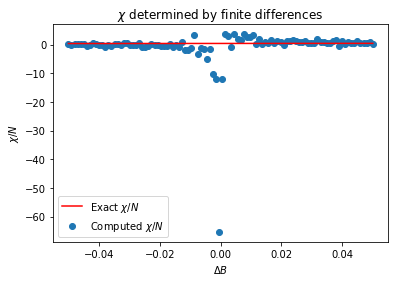

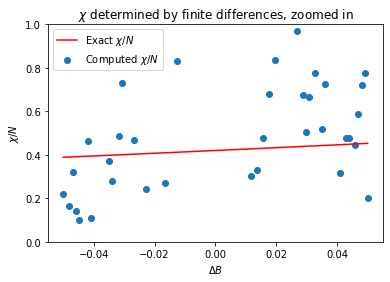

In [10]:
B = 1
exp_M = Solver(Lattice(L = L, B = B)).fullsolve(iter, ("<M>"))["<M>"]
chi = []

B_iter = np.linspace(0.95, 1.05, 100)
for b in B_iter:
    dB = b - B
    e_M = Solver(Lattice(L = L, B = b)).fullsolve(iter, ("<M>"))["<M>"]
    dM = e_M - exp_M
    
    chi.append(dM / dB)

plt.scatter(B - B_iter, np.array(chi)/L**2, label=r"Computed $\chi / N$")
plt.plot(B - B_iter, 1/np.cosh(B_iter)**2, label=r"Exact $\chi / N$", color="r")
plt.xlabel(r"$\Delta B$")
plt.ylabel(r"$\chi / N$")
plt.title(r"$\chi$ determined by finite differences")
plt.legend()

plt.figure()
plt.scatter(B - B_iter, np.array(chi)/L**2, label=r"Computed $\chi / N$")
plt.plot(B - B_iter, 1/np.cosh(B_iter)**2, label=r"Exact $\chi / N$", color="r")
plt.ylim(0, 1)
plt.xlabel(r"$\Delta B$")
plt.ylabel(r"$\chi / N$")
plt.title(r"$\chi$ determined by finite differences, zoomed in")
plt.legend()

At small differences ($\Delta B \approx 0$), $\chi$ displays an asymptotic behavior (due to the near division by zero). This regime is not very useful.

At slightly larger displacements, the obtained values for $\chi$ are in the expected order of magnitude. Obtaining the correct value however doesn't seem feasible using this method. With $\Delta B > 0$, the computed values of $\chi$ are above the exact values. For $\Delta B < 0$ the computed values are smaller than the exact values. If we take the mean of these two regimes and ignoring $\Delta B \approx 0$ we "might" obtain a reasonable value for $\chi$. I feel however, that this is not very accurate.